# COGS 108 - Final Project 

# Overview

The NFL season usually starts in September and ends in February. Across the 17-week regular season and the playoffs afterwards, weather conditions at a team’s home stadium could change substantially. Furthermore, teams not only play at their home stadiums, but also have to travel to other regions in the country, possibly with very different climate, to play away games. Therefore, it is expected that teams will play under different weather conditions throughout the season. Knowing the relationship between team performance and weather conditions will be useful to NFL teams so that they may adopt different strategies under different weather conditions and hold special training sessions before playing at their least favorite weather conditions.  


# Names

- Annie Wai
- Chen Xu
- Christopher Yeh
- Ronak Sheth
- Shun Fujinami

- Yupei Zhou

# Group Members IDs

- A12944645
- A15720503
- A92086612
- A14255552
- A13636618
- A13410536

# Research Question

Our question is how does weather, with an emphasis on temperature, wind speed, and humidity affect the outcome of a National Football League (NFL) game. We will be analyzing the weather data during each NFL game, and finding a correlation between how well each team performs within given weather parameters.

## Background and Prior Work



References (include links): 
- 1)
- 2)

# Hypothesis


Our hypothesis to the question is that each team will have a preferred weather range in which they perform their best, and that weather range will be most similar to the average weather at their home stadium. 

# Dataset(s)


- Dataset Name: NFL scores and betting data
- Link to the dataset: https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data#spreadspoke_scores.csv
- Number of observations: 12400

This dataset includes 12,400 games since the 1966 season with 17 variables including: 
schedule date, schedule season, schedule week, schedule playoff, team home, score home, score away, team away, team favorite id, spread favorite, over under line, stadium, stadium neutral, weather temperature, weather wind mph, weather humidity, and extra weather detail.


# Setup


In [1]:
from scipy.stats import ttest_ind, chisquare, normaltest, ttest_1samp

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning


We created a dataframe from the dataset csv file. We will drop the following unused columns: schedule season, schedule week, schedule playoff, stadium neutral, team favorite id, spread favorite, and over under line. We will also drop any games played indoors.

In [2]:
df = pd.read_csv("./nfl-scores-and-betting-data/spreadspoke_scores.csv")
df = df.drop(columns=["schedule_season", "schedule_week", "schedule_playoff", "stadium_neutral", 
                      "team_favorite_id", "spread_favorite", "over_under_line"],
             axis=1)
df = df[df.weather_detail != "DOME"]

Based on the score of the home and away team, we want to add a column to indicate the outcome of the game.

In [3]:
for index, row in df.iterrows():
    score_home = df.loc[index]['score_home']
    score_away = df.loc[index]['score_away']
    if score_home > score_away:
        df.at[index, 'home_w_l_t'] = 'WIN'
    elif score_away > score_home:
         df.at[index, 'home_w_l_t'] = 'LOSS'
    else:
        df.at[index, 'home_w_l_t'] = 'TIE'

It would appear that most entries are missing weather humidity and weather detail, so we are dropping rows without weather humidity and the whole column of weather detail.

In [4]:
df.dropna(subset=['weather_humidity'], inplace = True)
df = df.drop(columns = ['weather_detail'])
df.head()

schedule_date           team_home  score_home  score_away        team_away  \
0    09/02/1966      Miami Dolphins          14          23  Oakland Raiders   
1    09/03/1966      Houston Oilers          45           7   Denver Broncos   
2    09/04/1966  San Diego Chargers          27           7    Buffalo Bills   
3    09/09/1966      Miami Dolphins          14          19    New York Jets   
4    09/10/1966   Green Bay Packers          24           3  Baltimore Colts   

          stadium  weather_temperature  weather_wind_mph weather_humidity  \
0     Orange Bowl                 83.0               6.0               71   
1    Rice Stadium                 81.0               7.0               70   
2  Balboa Stadium                 70.0               7.0               82   
3     Orange Bowl                 82.0              11.0               78   
4   Lambeau Field                 64.0               8.0               62   

  home_w_l_t  
0       LOSS  
1        WIN  
2        WIN  
3       LOSS  
4        WIN

Here we'll gather the temperature and wind speed data separately.

In [5]:
temp_win = []
temp_tie = []
temp_loss = []
wind_win = []
wind_tie = []
wind_loss = []

for index, row in df.iterrows():
    if row["home_w_l_t"] == "WIN":
        temp_win.append(row["weather_temperature"])
        wind_win.append(row["weather_wind_mph"])
    elif row["home_w_l_t"] == "TIE":
        temp_tie.append(row["weather_temperature"])
        wind_tie.append(row["weather_wind_mph"])
    else:
        temp_loss.append(row["weather_temperature"])
        wind_loss.append(row["weather_wind_mph"])

# Data Analysis & Results

(array([  13.,   35.,  109.,  336.,  699.,  967., 1143.,  973.,  503.,
          84.]),
 array([-5. ,  4.7, 14.4, 24.1, 33.8, 43.5, 53.2, 62.9, 72.6, 82.3, 92. ]),
 <a list of 10 Patch objects>)

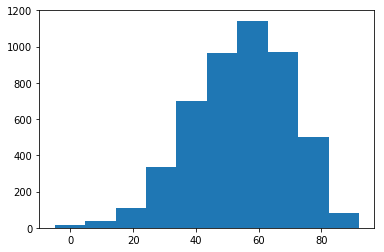

In [6]:
# here I will graph the histogram for the temperatures
# temp_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_temperature"])

(array([ 2.,  4., 10.,  7.,  7., 17., 12.,  6.,  3.,  2.]),
 array([20. , 26.2, 32.4, 38.6, 44.8, 51. , 57.2, 63.4, 69.6, 75.8, 82. ]),
 <a list of 10 Patch objects>)

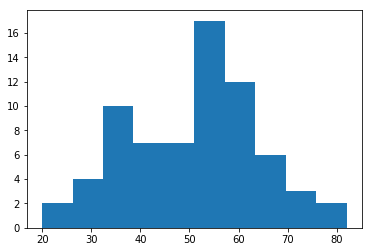

In [7]:
# temp_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_temperature"])

(array([  7.,  24., 101., 287., 559., 758., 817., 581., 288.,  34.]),
 array([-2. ,  7.7, 17.4, 27.1, 36.8, 46.5, 56.2, 65.9, 75.6, 85.3, 95. ]),
 <a list of 10 Patch objects>)

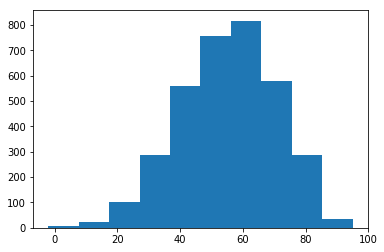

In [8]:
# temp_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_temperature"])

(array([ 143.,  722., 1438., 1283.,  681.,  371.,  144.,   56.,   22.,
           2.]),
 array([ 0. ,  3.1,  6.2,  9.3, 12.4, 15.5, 18.6, 21.7, 24.8, 27.9, 31. ]),
 <a list of 10 Patch objects>)

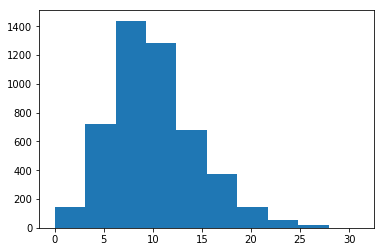

In [9]:
# histograms for wind_speeds
# wind_win histogram
plt.hist(df[df["home_w_l_t"] == "WIN"]["weather_wind_mph"])

(array([ 9.,  8., 19., 15., 10.,  4.,  3.,  0.,  1.,  1.]),
 array([ 4. ,  6.1,  8.2, 10.3, 12.4, 14.5, 16.6, 18.7, 20.8, 22.9, 25. ]),
 <a list of 10 Patch objects>)

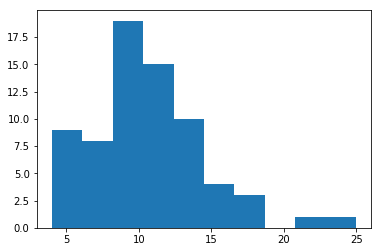

In [10]:
# wind_tie histogram
plt.hist(df[df["home_w_l_t"] == "TIE"]["weather_wind_mph"])

(array([ 128.,  522., 1033.,  896.,  498.,  263.,   81.,   22.,    8.,
           5.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <a list of 10 Patch objects>)

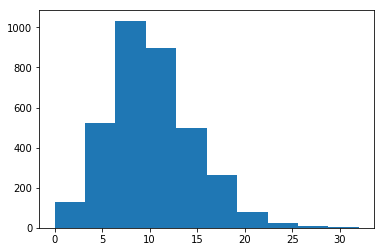

In [11]:
# wind_loss histogram
plt.hist(df[df["home_w_l_t"] == "LOSS"]["weather_wind_mph"])

Use a t-test to check if there is any statistically significant difference between temp_win and temp_loss. We set the significance level 0.01. If there is a significant difference, then temperature might be useful in determining outcomes of the matches. As it turns out, there is a statistically significant difference, as the p-value is smaller than 0.01.

In [103]:
t_val_weather, p_val_weather = ttest_ind(temp_win, temp_loss)
t_val_weather, p_val_weather

(-2.741049044299961, 0.006137419103358492)

We can carry out a similar t-test for wind speed. However, there is not a significant different between wind_win and wind_loss as the p-value is larger than 0.01. 

In [105]:
t_val_wind, p_val_wind = ttest_ind(wind_win, wind_loss)
t_val_wind, p_val_wind

(1.4349573206864878, 0.15133686599379564)

We would like to predict the outcome of the matches based on home team, away team and weather temperature information. We can standarize all the temperatures based on the home team and the outcome of the matches. 

In [16]:
# Make a copy of df
df1 = df.copy()

First we can compute the average temperature of games with each of the three outcomes (WIN/LOSS/TIE) for each team.

In [17]:
# The averages are saved as a new column 'avg_temperature'
df1['avg_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.mean)

Then we can compute the standard deviation of temperatue of games with each of the three outcomes (WIN/LOSS/TIE) for each team.

In [18]:
# The standard deviations are saved as a new column 'std_temperature'
df1['std_temperature'] = df1.groupby(['team_home', 'home_w_l_t'])['weather_temperature'].transform(np.std)

With average and standard deviation of each group already computed, we can proceed to compute the z-score.

In [19]:
# The z-scores are saved as a new column 'z_score_temperature'
df1['z_score_temperature'] = (df1['weather_temperature'] - df1['avg_temperature']) / df1['std_temperature']

In [20]:
df1[['team_home', 'weather_temperature', 'avg_temperature', 'std_temperature', 'z_score_temperature']].head()

team_home  weather_temperature  avg_temperature  std_temperature  \
0      Miami Dolphins                 83.0        76.254386         6.995335   
1      Houston Oilers                 81.0        79.000000         2.828427   
2  San Diego Chargers                 70.0        63.828877         7.095555   
3      Miami Dolphins                 82.0        76.254386         6.995335   
4   Green Bay Packers                 64.0        42.695652        16.134627   

   z_score_temperature  
0             0.964302  
1             0.707107  
2             0.869717  
3             0.821349  
4             1.320412

In [39]:
# Import some useful packages for the classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings("ignore")

For this step, we will predict the outcome only based on *team_home*, *team_away*, and *z_score_temperature*. <br>
Notice that there are some null values in the *z_score_temperature* column. The reason is that some teams only win/lose/tie one match at home, so the corresponding standard deviation of temperature would be 0. To account for this, we will impute these null values with 0 since theoreticaly they are the same as the average. <br>
Furthermore, we drop tied matches because they are very rare and usually we do not expect the match to tie nowadays. <br>
Also for we convert all WIN in the *home_w_l_t* columns with 1.0 and all LOSS in the *home_w_l_t* column with 0.0.

In [72]:
# Impute data
classifier_data = df1[['team_home', 'team_away', 'z_score_temperature', 'home_w_l_t']].fillna(0)

# Drop ties
classifier_data = classifier_data.loc[classifier_data['home_w_l_t'] != 'TIE']

# Convert labels
classifier_data['home_w_l_t'] = classifier_data['home_w_l_t'].replace({'WIN': 1.0, 'LOSS': 0.0})

Split the data into training data (80% of all) and test data (20% of all)

In [73]:
X = classifier_data.drop('home_w_l_t', axis = 1)
y = classifier_data.home_w_l_t
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Preprocess the *team_home* and *team_away* columns by one hot encoding them.

In [74]:
# Initialize the preprocessor
onehot_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers = [('onehot', onehot_transformer, ['team_home', 'team_away'])], remainder = 'passthrough')

Use the Random Forest classifier. At this step, we do not specify any parameters in the classifier. Then fit the model and compute the predictions.

In [75]:
classifier = Pipeline([('preprocessor', preprocessor),('classifier', RandomForestClassifier())])

# Fit the model 
classifier.fit(X_train, y_train)

# Compute the predictions
preds = classifier.predict(X_test)

After we have the predictions, we can look at some statistics. <br>
The accuracy score measures the overall accuracy of the model and the accuracy score of our model is 55%. <br>
The recall score measures the following: Among all the games which the home team wins, what proportions of them are correctly identified by our model. Our model correctly identifies 59% of them. <br>
The recall score of negative class measures the following: Among all the games which the home team loses, what proportions of them are correctly identified by our model. Our model correctly identifies 49% of them. <br>
The precision score measures the following: Among all the games that are predicted to be a home win by our model, what proportions of them are actually won by the home team. In our model, 63% of the games that are predicted to be a home win by our model are actually won by the home team.

In [77]:
(metrics.accuracy_score(y_test, preds), # accuracy score
metrics.recall_score(y_test, preds), # recall score
metrics.recall_score(y_test, preds, pos_label = 0), # recall score of the negative class
metrics.precision_score(y_test, preds)) # precision score

(0.5480769230769231,
 0.5803842264914054,
 0.5007407407407407,
 0.6300768386388584)

We can do a grid search to see if changing some parameters in the Random Forest Classifier will result in a better accuracy score. 

In [99]:
# Some candidates for the paratemers.
parameters = {
    'classifier__max_depth': [10,20,30,40], 
    'classifier__min_samples_split':[2,4,7,10],
    'classifier__min_samples_leaf':[2,4,7,10]
}

# Use the grid search to search for the best paratemers with 3-fold cross validation
clf = GridSearchCV(classifier, parameters, scoring = 'accuracy', cv = 3)
clf.fit(X_train, y_train)
clf.best_params_

{'classifier__max_depth': 40,
 'classifier__min_samples_leaf': 7,
 'classifier__min_samples_split': 7}

Then we can build the Random Forest classifier with the grid searched parameters to see how much increase we gain in accuracy score.

In [100]:
classifier = Pipeline([('preprocessor', preprocessor),\
                       ('classifier', RandomForestClassifier(max_depth = clf.best_params_['classifier__max_depth'], \
                                                             min_samples_leaf = clf.best_params_['classifier__min_samples_split'], \
                                                             min_samples_split = clf.best_params_['classifier__min_samples_split']))])
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

Indeed, there is an increase in accuracy score (55% to 60%). In terms of other statistics, there is a huge increase in recall_score (58% to 85%), meaning that the new model is much better at identifying home wins. However, an increase in some statistics result in an decrease in others. The new model has a much lower recall score of negative class (49% to 23%), which means the model is much worse at identifying home losses. There is also a slight decrease in precision score (63% to 62%). 

In [106]:
(metrics.accuracy_score(y_test, preds), # accuracy score
metrics.recall_score(y_test, preds), # recall score
metrics.recall_score(y_test, preds, pos_label = 0), # recall score of the negative class
metrics.precision_score(y_test, preds)) # precision score

(0.5991586538461539,
 0.8493427704752275,
 0.2325925925925926,
 0.6185567010309279)

In [109]:
# For this part of our analysis, we want to find out whether the average winning temperature of each team
# plays an role in the outcome of a game.
# To do this, we will have to get the average winning temperature for each team. 
# First we iterate through each entry of the dataframe, get the game temperature
# and save it as the value under the winning team of the game
winning_temps = {}
for index, row in df.iterrows():
    # only counting the winning temperature
    if row["home_w_l_t"] == "WIN":
        if row["team_home"] in winning_temps:
            winning_temps[row["team_home"]].append(row["weather_temperature"])
        else:
            winning_temps[row["team_home"]] = [row["weather_temperature"]]
    elif row["home_w_l_t"] == "LOSS":
        if row["team_away"] in winning_temps:
            winning_temps[row["team_away"]].append(row["weather_temperature"])
        else:
            winning_temps[row["team_away"]] = [row["weather_temperature"]]

# Now we loop through all teams in our winning_temps dictionary, and calculate the average winning 
# temperature of each team and save it in avg_winning_temp
avg_winning_temp = {}
for team in winning_temps.keys():
    total = 0
    for temp in winning_temps[team]:
        total += temp
    avg_winning_temp[team] = total / len(winning_temps[team])

In [110]:
# check avg_winning_temp
avg_winning_temp

{'Oakland Raiders': 56.56956521739131,
 'Houston Oilers': 53.23529411764706,
 'San Diego Chargers': 60.59726962457338,
 'New York Jets': 55.089928057553955,
 'Green Bay Packers': 45.914956011730204,
 'Los Angeles Rams': 59.41125541125541,
 'Kansas City Chiefs': 52.31683168316832,
 'Detroit Lions': 51.16935483870968,
 'St. Louis Cardinals': 52.07971014492754,
 'Cleveland Browns': 50.10294117647059,
 'Buffalo Bills': 50.810344827586206,
 'Dallas Cowboys': 58.382716049382715,
 'New England Patriots': 51.98776758409786,
 'Baltimore Colts': 51.45454545454545,
 'Philadelphia Eagles': 53.578947368421055,
 'Pittsburgh Steelers': 49.101736972704714,
 'Washington Redskins': 54.40112994350282,
 'Denver Broncos': 51.367123287671234,
 'Chicago Bears': 50.2952380952381,
 'San Francisco 49ers': 56.6875,
 'Minnesota Vikings': 48.49767441860465,
 'New York Giants': 54.10248447204969,
 'Boston Patriots': 46.5,
 'Atlanta Falcons': 57.02840909090909,
 'New Orleans Saints': 58.419117647058826,
 'Cincinnati

In [111]:
# check the length of our dictionary
len(avg_winning_temp)

40

In [112]:
# this could be a problem since there are 40+ teams but only 40 teams have winning records
# for now I will assume the teams not in the list to lose 100% of the time

# function used to predict the outcome of a game based on each team's avg_winning_temp
# here we pass in the home_team name, away_team name, and the game temperature
# return True if game temperature is closer to home_team's avg_winning temperature
# False if otherwise, note that I assume if two teams are equally close to the winning temperature
# home_team should win due to home game advantage
def prediction(home_team, away_team, game_temp):
    home_diff = abs(avg_winning_temp[home_team] - game_temp)
    away_diff = abs(avg_winning_temp[away_team] - game_temp)
    if home_diff <= away_diff:
        return "WIN"
    else:
        return "LOSS"

In [113]:
# now let's do some tests
df.head()

schedule_date           team_home  score_home  score_away        team_away  \
0    09/02/1966      Miami Dolphins          14          23  Oakland Raiders   
1    09/03/1966      Houston Oilers          45           7   Denver Broncos   
2    09/04/1966  San Diego Chargers          27           7    Buffalo Bills   
3    09/09/1966      Miami Dolphins          14          19    New York Jets   
4    09/10/1966   Green Bay Packers          24           3  Baltimore Colts   

          stadium  weather_temperature  weather_wind_mph weather_humidity  \
0     Orange Bowl                 83.0               6.0               71   
1    Rice Stadium                 81.0               7.0               70   
2  Balboa Stadium                 70.0               7.0               82   
3     Orange Bowl                 82.0              11.0               78   
4   Lambeau Field                 64.0               8.0               62   

  home_w_l_t  
0       LOSS  
1        WIN  
2        WIN  
3       LOSS  
4        WIN

In [114]:
# pick game 0, Miami Dolphins vs Oakland Raiders, the actual result is loss
home_team = "Miami Dolphins"
away_team = "Oakland Raiders"
game_temp = 83.0
result = prediction(home_team, away_team, game_temp)
if result == "WIN":
    print("Home team wins")
else:
    print("Home team loses")

Home team wins


In [115]:
# well, the first test shows opposite result of the actual result
# let's loop through all games in our data frame and check the accuracy of this method
correct_count = 0
for index, row in df.iterrows():
    home_team = row["team_home"]
    away_team = row["team_away"]
    game_temp = row["weather_temperature"]
    if prediction(home_team, away_team, game_temp) == row["home_w_l_t"]:
        correct_count += 1
accuracy = correct_count / len(df)
print(accuracy)

0.515855984740105


In [116]:
# This method only has a 51% accuracy
# a random result generator would give around 50% accuracy, so this approach does not seem
# to indicate average winning temperature and game result are related in anyway

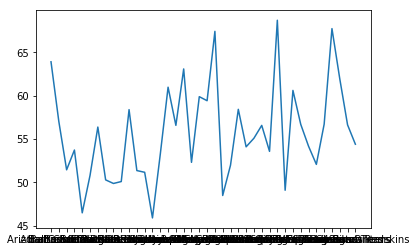

In [117]:
# plot the avg_winning_temp
lists = sorted(avg_winning_temp.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [118]:
# For this part of our analysis, we will test if the overal win/loss record of each team
# determines the game result. Note that after we cleaned the dataframe, we are left with
# close to 9000 data entries, but we have 40+ teams so this implies majority of the teams
# on our record did not play every other team in the league. This would generate a huge 
# hole in our prediction method. To counter this, we would calculate the the overall win
# rate of each team and use this data for our prediction when we run into the case where 
# the two teams have no prior game record.

# here I will use a nested dictionary
# here I will also create a overall win count and total gams played count for each team
import collections 
win_ratio = {}
win_count = {}
team_list = set()
for index, row in df.iterrows():
    team_list.add(row["team_home"])
    team_list.add(row["team_away"])
total_count = collections.Counter(team_list)
for index, row in df.iterrows():
    team_won = team_lost = ""
    if row["home_w_l_t"] == "WIN":
        team_won = row["team_home"]
        team_lost = row["team_away"]
    elif row["home_w_l_t"] == "LOSS":
        team_won = row["team_away"]
        team_lost = row["team_home"]

    if team_won in win_ratio:
        if team_lost in win_ratio[team_won]:
            win_ratio[team_won][team_lost] += 1
        else:
            win_ratio[team_won][team_lost] = 0
    else:
        win_ratio[team_won] = {team_lost: 0}
    if team_won in win_count:
        win_count[team_won] += 1
    else:
        win_count[team_won] = 1
    total_count[team_won] += 1
    total_count[team_lost] += 1

In [119]:
# here we display our win_ratio dictionary
for x in list(win_ratio)[0:3]:
    print (x + ": " + str(win_ratio[x]))

Oakland Raiders: {'Miami Dolphins': 9, 'Boston Patriots': 0, 'Denver Broncos': 24, 'Washington Redskins': 4, 'Pittsburgh Steelers': 12, 'Cleveland Browns': 8, 'San Diego Chargers': 29, 'New York Jets': 9, 'Kansas City Chiefs': 27, 'Philadelphia Eagles': 4, 'Cincinnati Bengals': 10, 'Houston Oilers': 2, 'Green Bay Packers': 2, 'Buffalo Bills': 5, 'Los Angeles Rams': 1, 'Chicago Bears': 4, 'St. Louis Cardinals': 0, 'Baltimore Colts': 2, 'New York Giants': 4, 'San Francisco 49ers': 2, 'Detroit Lions': 2, 'New England Patriots': 3, 'Dallas Cowboys': 3, 'New Orleans Saints': 0, 'Atlanta Falcons': 2, 'Tampa Bay Buccaneers': 4, 'Minnesota Vikings': 4, 'Seattle Seahawks': 9, 'Indianapolis Colts': 0, 'Jacksonville Jaguars': 2, 'St. Louis Rams': 1, 'Arizona Cardinals': 2, 'Carolina Panthers': 1, 'Tennessee Titans': 2, 'Baltimore Ravens': 0, 'Houston Texans': 1}
Houston Oilers: {'Denver Broncos': 1, 'Oakland Raiders': 1, 'Pittsburgh Steelers': 6, 'Cincinnati Bengals': 9, 'Buffalo Bills': 3, 'Balt

In [120]:
# now let's make a function that takes two teams, and predict the result base on win_ratio 
# if two teams never played with one another, we will use the overall win rate of each team 
# and assume the team with higher overall win rate would win the game
def predictWinRatio(team1, team2):
    if team1 in win_ratio and team2 in win_ratio:
            if team2 in win_ratio[team1]:
                # here we will have to take care of the equal case later, I just include it here
                if win_ratio[team1][team2] >= win_ratio[team2][team1]:
                    return team1
                else:
                    return team2
            else:
                return team1 if win_count[team1] / total_count[team1] >= win_count[team2] / total_count[team2] else team2
    else:
        if team1 not in win_ratio:
            print("team1 not in win_ratio")
        if team2 not in win_ratio:
            print("team2 not in win_ratio")

In [121]:
correct_count = 0
for index, row in df.iterrows():
    team_won = team_lost = ""
    if row["home_w_l_t"] == "WIN":
        team_won = row["team_home"]
        tem_lost = row["team_away"]
    elif row["home_w_l_t"] == "LOSS":
        team_won = row["team_away"]
        tem_lost = row["team_home"]
    if predictWinRatio(team_won, team_lost) == team_won:
        correct_count += 1
accuracy = correct_count / len(df)
print(accuracy)

0.5927515498330949


We want to see if there are any correlation with the outcome of the game based on the difference of temperature from their average home temperature.

In [107]:
df1['diff_temperature'] = df1['avg_temperature'] - df1['weather_temperature']
df1.head()

schedule_date           team_home  score_home  score_away        team_away  \
0    09/02/1966      Miami Dolphins          14          23  Oakland Raiders   
1    09/03/1966      Houston Oilers          45           7   Denver Broncos   
2    09/04/1966  San Diego Chargers          27           7    Buffalo Bills   
3    09/09/1966      Miami Dolphins          14          19    New York Jets   
4    09/10/1966   Green Bay Packers          24           3  Baltimore Colts   

          stadium  weather_temperature  weather_wind_mph weather_humidity  \
0     Orange Bowl                 83.0               6.0               71   
1    Rice Stadium                 81.0               7.0               70   
2  Balboa Stadium                 70.0               7.0               82   
3     Orange Bowl                 82.0              11.0               78   
4   Lambeau Field                 64.0               8.0               62   

  home_w_l_t  avg_temperature  std_temperature  z_score_temperature  \
0       LOSS        76.254386         6.995335             0.964302   
1        WIN        79.000000         2.828427             0.707107   
2        WIN        63.828877         7.095555             0.869717   
3       LOSS        76.254386         6.995335             0.821349   
4        WIN        42.695652        16.134627             1.320412   

   diff_temperature  
0         -6.745614  
1         -2.000000  
2         -6.171123  
3         -5.745614  
4        -21.304348

Text(0, 0.5, 'Density')

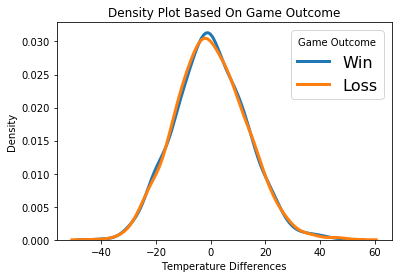

In [108]:
loss_temp = df1.loc[df1['home_w_l_t'] == 'LOSS']
win_temp = df1.loc[df1['home_w_l_t'] == 'WIN']
#tie_temp = df1.loc[df1['home_w_l_t'] == 'TIE'] #TODO possibly take this out



sns.distplot(loss_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Win')
sns.distplot(win_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Loss')
#sns.distplot(tie_temp['diff_temperature'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Tie')

plt.legend(prop={'size': 16}, title = 'Game Outcome')
plt.title('Density Plot Based On Game Outcome')
plt.xlabel('Temperature Differences')
plt.ylabel('Density')

# Ethics and Privacy

We do not have any privacy issues regarding this data as it was built from publicly available data published by the NFL, as well as publicly available weather data from NOAA. The ramifications of the results of this study could span to the population who places bets on the outcomes of NFL games, and this study could be used to predict unlikely outcomes. It is also important to consider the privacy and reputation of the sports teams analyzed, as negative attention to a team’s performance or brand may negatively affect their public opinion.

# Conclusion & Discussion

*Fill in your discussion information here*